### Name: Irene Cánovas Vidal and Alejandra Sánchez Torres

# Task 1: Working with a dataset with categorical features

## Step 1. Reading the data

In [9]:
import pandas as pd

# Read in training and test datasets
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

# Split data into input (X) and output (Y) parts
X_train = train_df.drop(['target'], axis=1)
Y_train = train_df['target']

X_test = test_df.drop(['target'], axis=1)
Y_test = test_df['target']


## Step 2: Encoding the features as numbers.

In [11]:
from sklearn.feature_extraction import DictVectorizer

# Convertir los datos de entrenamiento y prueba en diccionarios
train_dict = X_train.to_dict('records')
test_dict = X_test.to_dict('records')

# Crear un objeto DictVectorizer
vectorizer = DictVectorizer()

# Convertir los diccionarios en matrices NumPy
X_train_v = vectorizer.fit_transform(train_dict)
X_test_v = vectorizer.transform(test_dict)


## Step 3. Combining the steps.

In [16]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Read in training and test datasets
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

# Split data into input (X) and output (Y) parts
X_train = train_df.drop(['target'], axis=1)
Y_train = train_df['target']

X_test = test_df.drop(['target'], axis=1)
Y_test = test_df['target']

# Create a pipeline that includes DictVectorizer and DecisionTreeClassifier
pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier()
)

# Fit the pipeline to the training data
pipeline.fit(X_train.to_dict(orient='records'), Y_train)

# Make predictions on the test set
Y_pred = pipeline.predict(X_test.to_dict(orient='records'))

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 81.82%


# Task 2: Decision trees and random forests

## Underfitting and overfitting in decision tree classifiers.

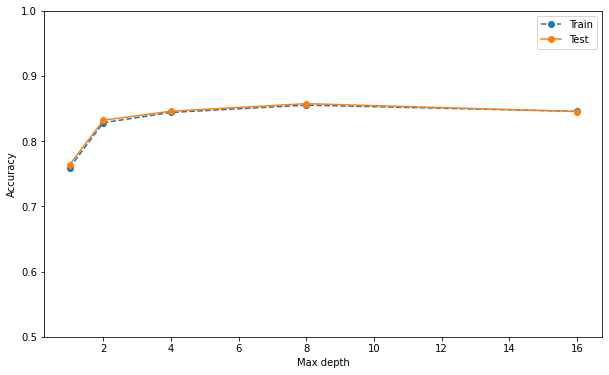

In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Read in training and test datasets
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

# Convert target variable to numerical using label encoding
train_df['target'] = train_df['target'].map({'<=50K': 0, '>50K': 1})
test_df['target'] = test_df['target'].map({'<=50K': 0, '>50K': 1})

# Split data into input (X) and output (Y) parts
X_train = train_df.drop(['target'], axis=1)
Y_train = train_df['target']

X_test = test_df.drop(['target'], axis=1)
Y_test = test_df['target']

# Create a pipeline that includes DictVectorizer and DecisionTreeClassifier
pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(random_state=0)
)

# Define a range of max depths to investigate
max_depths = [1, 2, 4, 8, 16]

# Initialize arrays to store the cross-validation scores
train_scores = np.zeros(len(max_depths))
test_scores = np.zeros(len(max_depths))

# Loop over the max depths and compute the cross-validation scores
for i, d in enumerate(max_depths):
    # Set the maximum depth of the decision tree
    pipeline.set_params(decisiontreeclassifier__max_depth=d)
    
    # Compute the cross-validation scores for the training and testing sets
    train_scores[i] = np.mean(cross_val_score(pipeline, X_train.to_dict(orient='records'), Y_train, cv=10, scoring='accuracy'))
    test_scores[i] = np.mean(cross_val_score(pipeline, X_test.to_dict(orient='records'), Y_test, cv=10, scoring='accuracy', n_jobs=-1))

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(max_depths, train_scores, label='Train', linestyle='--', marker='o')
ax.plot(max_depths, test_scores, label='Test', linestyle='-', marker='o')

ax.set_xlabel('Max depth')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.5, 1.0])
ax.legend()
plt.show()



The resulting plot shows a similar effect as in the regression example: the training accuracy increases with the depth of the decision tree, but the test accuracy plateaus and eventually decreases, indicating that the model starts to overfit to the training data.

Overall, this experiment illustrates the importance of selecting an appropriate model complexity, since a model that is too simple (underfitting) will have poor predictive performance, but a model that is too complex (overfitting) will generalize poorly to new data.

## Underfitting and overfitting in random forest classifiers.

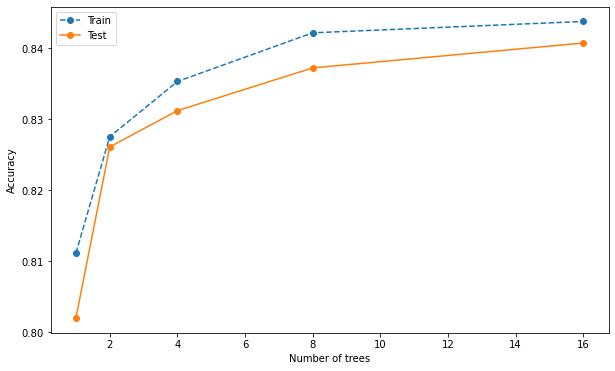

In [37]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Read in training and test datasets
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

# Convert target variable to numerical using label encoding
train_df['target'] = train_df['target'].map({'<=50K': 0, '>50K': 1})
test_df['target'] = test_df['target'].map({'<=50K': 0, '>50K': 1})

# Split data into input (X) and output (Y) parts
X_train = train_df.drop(['target'], axis=1)
Y_train = train_df['target']

X_test = test_df.drop(['target'], axis=1)
Y_test = test_df['target']

# Define a range of ensemble sizes to investigate
n_trees = [1, 2, 4, 8, 16]

# Create a pipeline that includes DictVectorizer and RandomForestClassifier
pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(random_state=0)
)

# Initialize arrays to store the cross-validation scores
train_scores = np.zeros(len(n_trees))
test_scores = np.zeros(len(n_trees))

# Loop over the ensemble sizes and compute the cross-validation scores
for i, n in enumerate(n_trees):
    # Set the number of trees in the random forest
    pipeline.set_params(randomforestclassifier__n_estimators=n)
    
    # Compute the cross-validation scores for the training and testing sets
    train_scores[i] = np.mean(cross_val_score(pipeline, X_train.to_dict(orient='records'), Y_train, cv=10, scoring='accuracy'))
    test_scores[i] = np.mean(cross_val_score(pipeline, X_test.to_dict(orient='records'), Y_test, cv=10, scoring='accuracy', n_jobs=-1))

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(n_trees, train_scores, label='Train', linestyle='--', marker='o')
ax.plot(n_trees, test_scores, label='Test', linestyle='-', marker='o')

ax.set_xlabel('Number of trees')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

**What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?**

The curve for a decision tree and for a random forest with an ensemble size of 1 can be different due to the high variance of decision trees. A decision tree can easily overfit to the training data, resulting in a high training set accuracy and a low test set accuracy. On the other hand, a random forest with only one tree will not have the same level of overfitting due to the randomization of features and samples, but it may still suffer from high variance. Therefore, we can expect the random forest with an ensemble size of 1 to have a slightly higher test set accuracy than a decision tree, but the difference may not be significant.


**What happens with the curve for random forests as the ensemble size grows?**

As the ensemble size of a random forest grows, the performance generally improves, up to a point. The curve for the random forest becomes smoother and more stable, as the averaging effect of the ensemble reduces the variance of the model. However, after a certain point, increasing the ensemble size may not lead to a significant improvement in performance, and it may even lead to overfitting.


**What happens with the best observed test set accuracy as the ensemble size grows?**

The best observed test set accuracy generally improves as the ensemble size of a random forest grows, up to a certain point. This is because the random forest is able to reduce the variance of the model by averaging the predictions of multiple trees. However, after a certain point, increasing the ensemble size may not lead to a significant improvement in performance, and it may even lead to overfitting. Therefore, it is important to choose an appropriate ensemble size based on the performance on the validation set.


**What happens with the training time as the ensemble size grows?**

The training time generally increases as the ensemble size of a random forest grows. This is because training each tree in the forest requires processing a subset of the training data and a random subset of features. Therefore, as the ensemble size grows, the amount of data and features processed increases, leading to longer training times. However, the training time of a random forest can be reduced by parallelizing the training process across multiple CPUs or GPUs.


# Task 3: Feature importances in random forest classifiers

In [35]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Read in training and test datasets
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

# Convert target variable to numerical using label encoding
train_df['target'] = train_df['target'].map({'<=50K': 0, '>50K': 1})
test_df['target'] = test_df['target'].map({'<=50K': 0, '>50K': 1})

# Split data into input (X) and output (Y) parts
X_train = train_df.drop(['target'], axis=1)
Y_train = train_df['target']

X_test = test_df.drop(['target'], axis=1)
Y_test = test_df['target']

# Define pipeline
pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(n_estimators=4, random_state=42)
)

# Fit the pipeline on the training data
pipeline.fit(X_train.to_dict(orient='records'), Y_train)

# Extract feature importances from the final step in the pipeline
importances = pipeline.steps[-1][1].feature_importances_

# Get feature names from the DictVectorizer
feature_names = pipeline.steps[0][1].vocabulary_.keys()

# Create a list of (feature, importance) tuples and sort by importance in descending order
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
for feature, importance in feature_importances[:10]:
    print(f"{feature}: {importance}")


age: 0.23053890232823845
workclass=Private: 0.14094107441031797
relationship=Husband: 0.1184204884768103
occupation=Transport-moving: 0.07229141327672083
education-num: 0.04220039390406214
education=Some-college: 0.04025855549365053
education=Preschool: 0.02850206308189041
native-country=Cambodia: 0.02487699497921526
native-country=Poland: 0.02234797077304398
marital-status=Married-AF-spouse: 0.01938092356470559


This code should print the top 10 most important features along with their importance scores, sorted in descending order.

The feature importance scores indicate the relative importance of each feature in the model for making predictions. The feature with the highest importance score is the most important one and the feature with the lowest importance score is the least important one.

Looking at the top features, we can see that age is the most important feature in this model, which makes sense given that age is often a strong predictor of income. The second most important feature is workclass, specifically when it is Private, suggesting that whether or not someone works in the private sector is a good indicator of their income level.

The third most important feature is relationship, specifically when it is Husband, which suggests that being married and being the husband in the relationship are associated with higher income levels. Occupation is also an important feature, with Transport-moving being the most important occupation in this model.

Overall, the feature importance scores suggest that the model is taking into account a mix of demographic, employment, and educational factors when making income predictions.

One alternative way to compute feature importance scores is by using permutation importance. Permutation importance measures the importance of each feature by randomly shuffling the values of that feature in the test set and evaluating the decrease in the model's performance (accuracy or F1-score). The idea is that if shuffling the values of a feature results in a significant decrease in model performance, then that feature is considered important. This method has the advantage of being model-agnostic and can be applied to any type of model. However, it can be computationally expensive, especially for models that require a lot of time to train.